## Compute the emittance growth for white noise case including the contribution of the tune distribution 

In [1]:
import scipy.integrate as integrate
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [85]:
def emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaPhi, noise_psd, rho_b): 
    
    ey_rate = betay*(Vcc*frev/(2*Eb))**2*CDeltaPhi
    
    
    #result = integrate.quad(lambda vb: noise_psd(vb*frev)*rho_b(vb), 0.1, 2)
    x = np.linspace(0.,1, 100000)
    dx = x[1]-x[0]
    y = np.array(noise_psd(x*frev)*rho_b(x))
    result = integrate.trapz(y,dx=dx)
    
    print(result)
    
    print(2*ey_rate)
    return result*ey_rate

In [3]:
def expon_distribution(x, mu, b): 
    return np.heaviside(x-mu, 1)*(1/b) * np.exp(-(x-mu)/b)
  

In [26]:
integrate.quad(lambda vb: rho_b(vb), 0.1, 2)

(1.0000000003544283, 1.3045775827781477e-09)

In [27]:
def gaussian_distribution(x, mu, c, alpha):
    return alpha*np.exp(-(x-mu)**2/(2*c**2))

### SPS parameters

In [28]:
betay = 76 # m
# Beam parameters
Vcc = 1e6# V
frev = 43.45e3 # Hz
Eb = 270e9 # eV
CDeltaPhi = 0.52 # approx
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
beta_0 = 0.999999
gamma_0 = 287.7

### Function for tune distribution

In [48]:
rho_b = lambda vb : expon_distribution(vb, 0.18, 0.00146)

### Compute the PSD of the signal

In [88]:
PSD_vb = 3.2e-22 #1.58e-20  # rad^2/Hz
alpha = PSD_vb*(scale_factor)**2 # scaled to the simulations
mu = 0.18*frev
c = 0.06*frev
noise_psd = lambda f : gaussian_distribution(f, mu, c, alpha)

In [89]:
noise_psd(7821) # test psd tat the betatron sideband

2.3327999999999998e-11

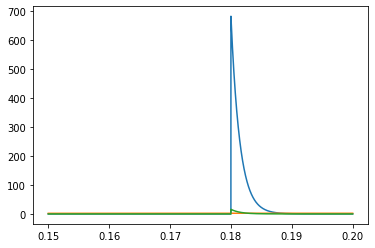

In [90]:
x = np.linspace(0.15,0.2, 10000)
plt.plot(x, rho_b(x))
plt.plot(x, 1e11*noise_psd(x*frev))
plt.plot(x, rho_b(x)*1e9*noise_psd(x*frev))

### Call the function computing the emittance

In [91]:
ey_geom_rate_phi = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaPhi, noise_psd, rho_b)
ey_norm_rate_phi = ey_geom_rate_phi*beta_0*gamma_0

2.3365352444443795e-11
0.5117277558299039


In [87]:
print('dey/dt = {} nm/s'.format(ey_norm_rate_phi*1e9))

dey/dt = 84.92349329646109 nm/s


In [92]:
print('dey/dt = {} nm/s'.format(ey_norm_rate_phi*1e9))

dey/dt = 1.7199694844852875 nm/s


print('dey/dt = {} nm/s'.format(ey_norm_rate_phi*1e9))